In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('round-1-island-data-bottle\\prices_round_1_day_-2.csv',sep = ';')
kelp_df = df[df['product'] == 'RAINFOREST_RESIN']
kelp_df[kelp_df['ask_price_2'] < 10000]


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss


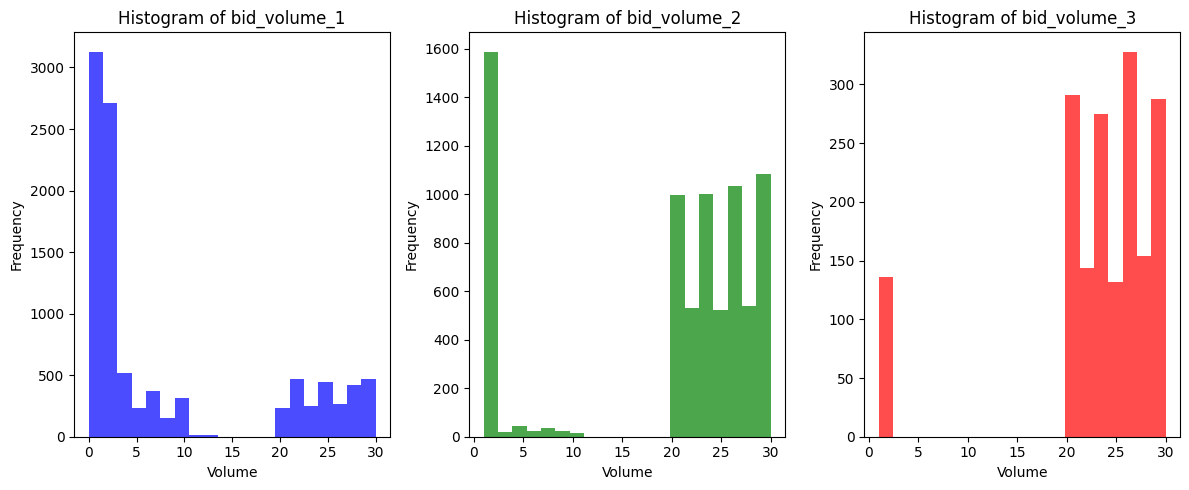

In [6]:
# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Plot histogram for bid_volume_1
ax1.hist(kelp_df['bid_volume_1'], bins=20, alpha=0.7, color='blue')
ax1.set_title('Histogram of bid_volume_1')
ax1.set_xlabel('Volume')
ax1.set_ylabel('Frequency')

# Plot histogram for bid_volume_2
ax2.hist(kelp_df['bid_volume_2'], bins=20, alpha=0.7, color='green')
ax2.set_title('Histogram of bid_volume_2')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Frequency')

# Plot histogram for bid_volume_3
ax3.hist(kelp_df['bid_volume_3'], bins=20, alpha=0.7, color='red')
ax3.set_title('Histogram of bid_volume_3')
ax3.set_xlabel('Volume')
ax3.set_ylabel('Frequency')



plt.tight_layout()
plt.show()

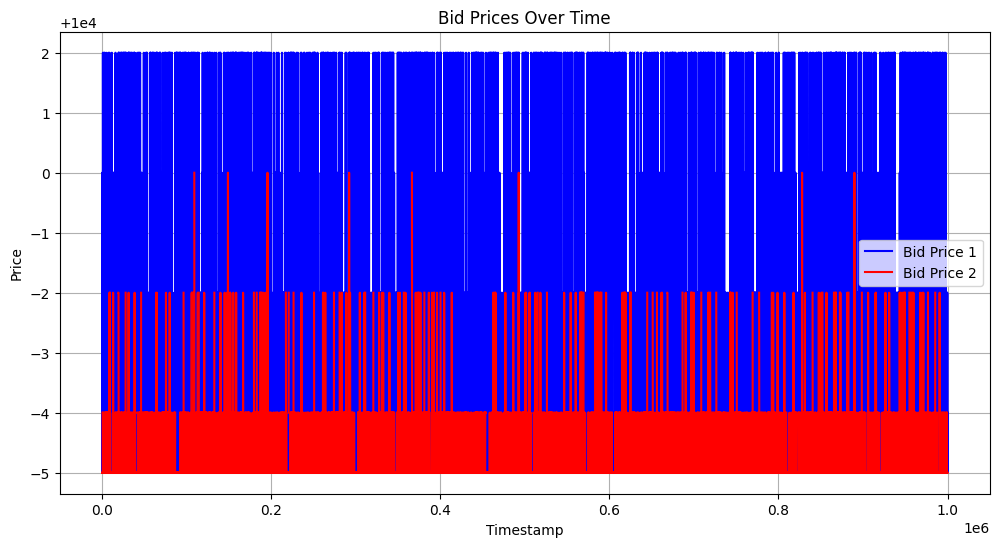

In [7]:
# Create a line plot comparing bid_price_1 and bid_price_2
plt.figure(figsize=(12, 6))
plt.plot(kelp_df['timestamp'], kelp_df['bid_price_1'], label='Bid Price 1', color='blue')
plt.plot(kelp_df['timestamp'], kelp_df['bid_price_2'], label='Bid Price 2', color='red')
plt.title('Bid Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import math
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# 1) Read your CSVs
df_minus2 = pd.read_csv("prices_round_1_day_-2.csv", sep=';')
df_minus1 = pd.read_csv("prices_round_1_day_-1.csv", sep=';')
df_zero   = pd.read_csv("prices_round_1_day_0.csv",  sep=';')

# 2) Concatenate
df_minus2["filename"] = "day_minus2"
df_minus1["filename"] = "day_minus1"
df_zero["filename"]   = "day_0"

df_combined = pd.concat([df_minus2, df_minus1, df_zero], ignore_index=True)
df_combined.columns = [
    "day","timestamp","product",
    "bid_price_1","bid_volume_1",
    "bid_price_2","bid_volume_2",
    "bid_price_3","bid_volume_3",
    "ask_price_1","ask_volume_1",
    "ask_price_2","ask_volume_2",
    "ask_price_3","ask_volume_3",
    "mid_price","profit_and_loss",
    "filename"
]

# Filter for SQUID_INK
df_squid = df_combined[df_combined["product"]=="SQUID_INK"].copy()
df_squid.sort_values(["day","timestamp"], inplace=True)

# We'll pick a rolling window of 100 timestamps
window_size = 100

days_unique = sorted(df_squid["day"].unique())

# 3) ADF test day-by-day
for day_val in days_unique:
    subset = df_squid[df_squid["day"]==day_val].copy()
    subset = subset.sort_values("timestamp").reset_index(drop=True)
    subset["rolling_mean"] = subset["mid_price"].rolling(window=window_size).mean()
    subset["z"] = subset["mid_price"] - subset["rolling_mean"]
    subset.dropna(subset=["z"], inplace=True)
    
    if len(subset) < 30:
        print(f"[Day {day_val}] Not enough data after rolling => skip ADF. (Rows={len(subset)})")
        continue
    
    result = adfuller(subset["z"], autolag='AIC')
    adf_stat, p_value, usedlag, nobs, crit_vals, icbest = result
    print(f"[SQUID_INK, Day {day_val}, window={window_size}] len={len(subset)}")
    print(f"  ADF={adf_stat:.4f}, p={p_value:.4f}, usedlag={usedlag}, nobs={nobs}")
    print("  Critical Values:", crit_vals)
    print("-"*60)

# 4) Auto-correlation z(t)->z(t+1)
for day_val in days_unique:
    subset = df_squid[df_squid["day"]==day_val].copy()
    subset.sort_values("timestamp", inplace=True)
    subset["rolling_mean"] = subset["mid_price"].rolling(window=window_size).mean()
    subset["z"] = subset["mid_price"] - subset["rolling_mean"]
    subset["z_next"] = subset["z"].shift(-1)
    subset.dropna(subset=["z","z_next"], inplace=True)

    if len(subset)<2:
        print(f"[Day {day_val}] Not enough data for autoCorr => (Rows={len(subset)})")
        continue
    corr_val = subset["z"].corr(subset["z_next"])
    print(f"AutoCorr z(t)->z(t+1) [SQUID_INK, Day {day_val}] n={len(subset)} => {corr_val:.4f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,1970-01-01,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,1970-01-01,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,1970-01-01,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,0,1970-01-01,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
4,0,1970-01-01,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0



Descriptive Statistics for 'price':


count    90000.000000
mean      4664.861594
std       3772.800628
min       1810.500000
25%       1998.500000
50%       2031.500000
75%      10000.000000
max      10003.500000
Name: price, dtype: float64

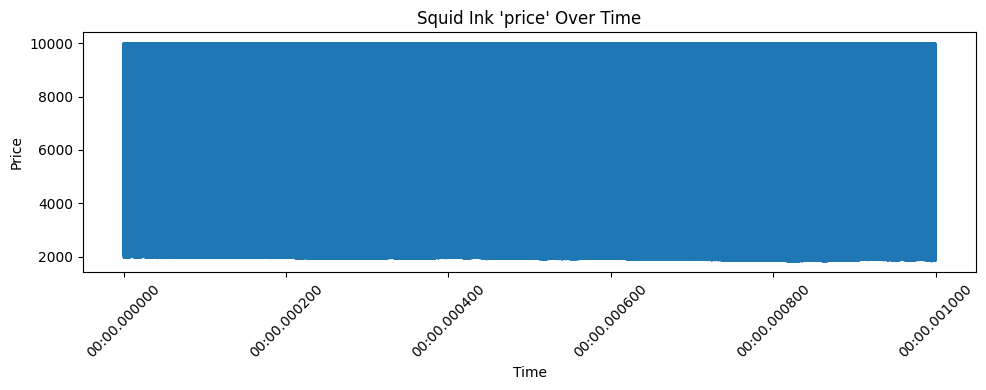


Final few rows with strategy signals and PnL:


,timestamp,price,z_score,position,pnl,cum_pnl
89990,1970-01-01 00:00:00.000999800,10000.0,1.488882,0,0.0,2048081.0
89991,1970-01-01 00:00:00.000999900,10000.0,1.328293,0,0.0,2048081.0
89992,1970-01-01 00:00:00.000999900,2028.0,-0.704759,0,0.0,2048081.0
89993,1970-01-01 00:00:00.000999900,10000.0,1.193759,0,0.0,2048081.0
89994,1970-01-01 00:00:00.000999900,2029.0,-0.789734,0,0.0,2048081.0
89995,1970-01-01 00:00:00.000999900,1972.0,-0.802752,0,0.0,2048081.0
89996,1970-01-01 00:00:00.000999900,1839.5,-0.832223,0,0.0,2048081.0
89997,1970-01-01 00:00:00.000999900,10000.0,1.193762,0,0.0,2048081.0
89998,1970-01-01 00:00:00.000999900,2004.0,-0.711009,0,0.0,2048081.0
89999,1970-01-01 00:00:00.000999900,2033.5,-0.626730,0,0.0,2048081.0


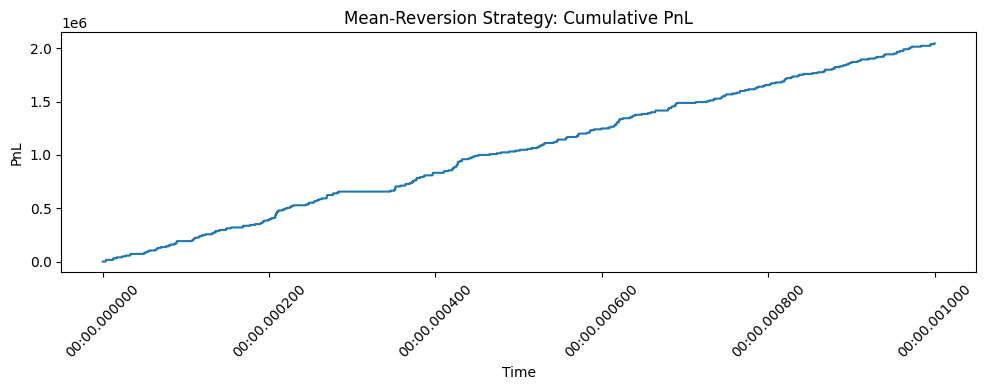

Final total PnL from this simple strategy: 2048081.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load with semicolon delimiter
df_day_0 = pd.read_csv('round-1-island-data-bottle\\prices_round_1_day_0.csv', sep=';')
df_day_m1 = pd.read_csv('round-1-island-data-bottle\\prices_round_1_day_-1.csv', sep=';')
df_day_m2 = pd.read_csv('round-1-island-data-bottle\\prices_round_1_day_-2.csv', sep=';')

# 2) Combine
df_raw = pd.concat([df_day_m2, df_day_m1, df_day_0], ignore_index=True)

# Let's inspect columns

df_raw = df_raw[df_raw['product'] == 'SQUID_INK']

# 3) Convert timestamp to datetime if needed
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

# Sort by timestamp
df_raw = df_raw.sort_values('timestamp').reset_index(drop=True)

# 4) Check a quick preview
display(df_raw.head(5))

# We'll use 'mid_price' as our primary price for analysis
if 'mid_price' not in df_raw.columns:
    print("\nThe data does not have a 'mid_price' column. Please specify which column to analyze.\n")
else:
    # Let's rename 'mid_price' -> 'price' for convenience
    df_raw.rename(columns={'mid_price': 'price'}, inplace=True)

    # 5) Basic Descriptive Statistics
    print("\nDescriptive Statistics for 'price':")
    display(df_raw['price'].describe())

    # 6) Quick Plot
    plt.figure(figsize=(10,4))
    plt.plot(df_raw['timestamp'], df_raw['price'])
    plt.title("Squid Ink 'price' Over Time")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 7) Simple Mean-Reversion Strategy:
    #    We'll compute a rolling z-score, then buy if z < -1.5, short if z > 1.5, exit when z crosses 0 again.
    window = 20  # This is the rolling window in 'bars' (rows)
    df = df_raw.copy()
    df['rolling_mean'] = df['price'].rolling(window).mean()
    df['rolling_std'] = df['price'].rolling(window).std()

    # To avoid NaN issues in the first 'window' rows
    df.dropna(subset=['rolling_mean','rolling_std'], inplace=True)

    df['z_score'] = (df['price'] - df['rolling_mean']) / df['rolling_std']

    upper_threshold = 1.5
    lower_threshold = -1.5
    stop_level = 2.5  # e.g. if it keeps going in the wrong direction

    position = 0  # +1 = long, -1 = short, 0 = flat
    entry_price = 0.0
    df['position'] = 0
    df['pnl'] = 0.0

    # We'll do a simple discrete-time "backtest" (no transaction cost)
    for i in range(len(df)):
        z = df.iloc[i]['z_score']
        current_price = df.iloc[i]['price']

        if position == 0:
            # Entry logic
            if z > upper_threshold:
                position = -1  # short
                entry_price = current_price
            elif z < lower_threshold:
                position = 1   # long
                entry_price = current_price
        else:
            # If we have a position, check if we should exit (z crosses 0) or hits a stop
            if position == 1:  # long
                # stop out if z < -stop_level
                if z > 0 or z < -stop_level:
                    # Calculate PnL
                    pnl_trade = (current_price - entry_price)
                    df.at[df.index[i], 'pnl'] = pnl_trade
                    position = 0
                    entry_price = 0.0

            elif position == -1:  # short
                # stop out if z > stop_level
                if z < 0 or z > stop_level:
                    pnl_trade = (entry_price - current_price)
                    df.at[df.index[i], 'pnl'] = pnl_trade
                    position = 0
                    entry_price = 0.0

        df.at[df.index[i], 'position'] = position

    # If we end the period in a position, we can close it out at the final price
    if position != 0:
        final_price = df.iloc[-1]['price']
        if position == 1:
            df.at[df.index[-1], 'pnl'] = (final_price - entry_price)
        else:
            df.at[df.index[-1], 'pnl'] = (entry_price - final_price)
        position = 0

    df['cum_pnl'] = df['pnl'].cumsum()

    print("\nFinal few rows with strategy signals and PnL:")
    display(df[['timestamp','price','z_score','position','pnl','cum_pnl']].tail(10))

    # 8) Plot the cumulative PnL
    plt.figure(figsize=(10,4))
    plt.plot(df['timestamp'], df['cum_pnl'])
    plt.title("Mean-Reversion Strategy: Cumulative PnL")
    plt.xlabel("Time")
    plt.ylabel("PnL")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 9) Print final PnL
    final_pnl = df['cum_pnl'].iloc[-1]
    print(f"Final total PnL from this simple strategy: {final_pnl:.2f}")
